### 分析自对抗过程中第一次生成图像和第二次生成图像直接按的质量提升

In [4]:
%matplotlib inline

RMSE : 81.50733947753906


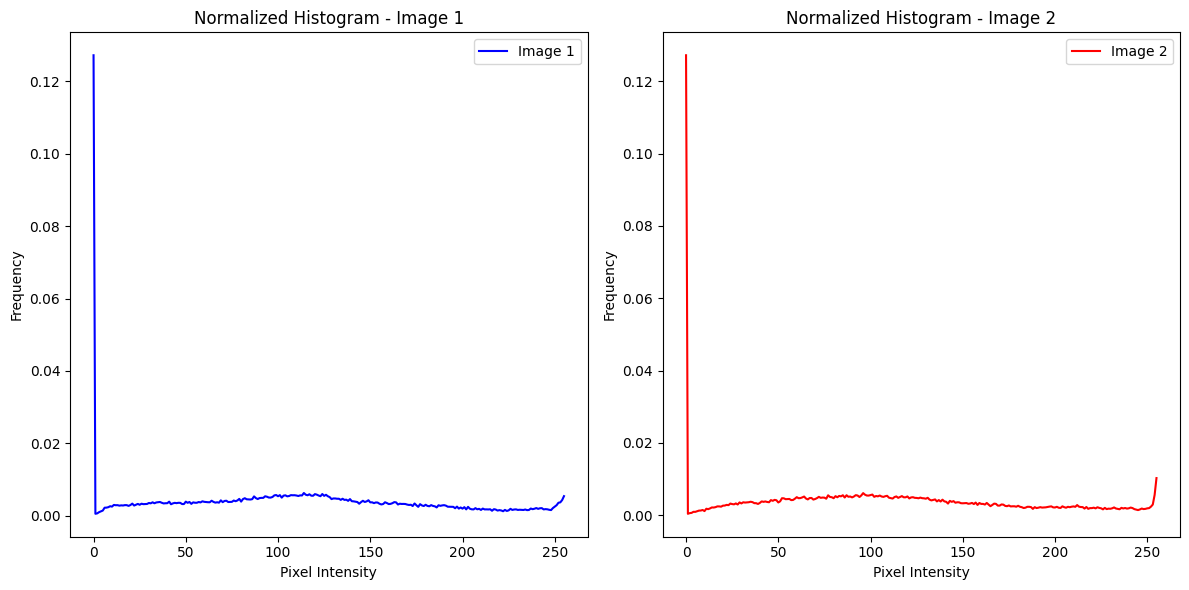

In [7]:

from PIL import Image
import numpy as np

# Load the images
img1_path = './两次生成图像的变化/5514/output_1image4000.png'
img2_path = './两次生成图像的变化/5514/output_2image4000.png'
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)

# Convert images to grayscale for simplicity
img1_gray = img1.convert('L')
img2_gray = img2.convert('L')

# Calculate the Root Mean Square Error (RMSE) between the two images
diff = np.asarray(img1_gray, dtype=np.float32) - np.asarray(img2_gray, dtype=np.float32)
mse = np.mean(np.square(diff))
rmse = np.sqrt(mse)

print(f"RMSE : {rmse}")

import matplotlib.pyplot as plt

# Convert images to numpy arrays
img1_array = np.array(img1_gray)
img2_array = np.array(img2_gray)

# Compute histograms of the grayscale intensity values
hist1, bins1 = np.histogram(img1_array.flatten(), bins=256, range=[0,256])
hist2, bins2 = np.histogram(img2_array.flatten(), bins=256, range=[0,256])

# Normalize the histograms by the total number of pixels to get frequency
norm_hist1 = hist1 / hist1.sum()
norm_hist2 = hist2 / hist2.sum()

# Plot the normalized histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(norm_hist1, color='blue', label='Image 1')
plt.title('Normalized Histogram - Image 1')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(norm_hist2, color='red', label='Image 2')
plt.title('Normalized Histogram - Image 2')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


直方图分析是一种评估图像像素分布的统计方法，它可以揭示关于图像亮度、对比度和曝光的信息。这是通过分析图像中每个像素强度值的频率来完成的。

在上面显示的归一化直方图中，横轴表示像素强度值（从0到255），而纵轴表示每个强度值的归一化频率。这些分布可以提供以下信息：

图像亮度: 直方图向左（低强度值）偏移表示图像较暗，向右（高强度值）偏移表示图像较亮。两个图像的直方图都显示出广泛的分布，但是图像 2 似乎在较亮的区域有更多的像素分布，这表明它可能整体上更亮一些。

图像对比度: 直方图的宽度可以表示对比度。一个宽的直方图，像图像 2 中的，通常意味着更高的对比度，因为像素值从很暗到很亮都有覆盖。图像 1 的直方图显示出较为集中的分布，这可能意味着对比度较低。

图像曝光: 如果直方图在两端都有像素，但中间区域像素较少，这可能是曝光不均的迹象。两个图像的直方图都没有显示明显的曝光问题。

细节捕捉: 直方图中的峰值和谷值可以表示图像中的细节。例如，一个具有多个峰值的直方图可能表示图像捕捉到了多种强度级别的细节。这两个图像的直方图都比较平滑，没有明显的尖峰，这可能意味着没有一个特定的强度级别特别突出。

基于这些分析，我们可能会推断图像 2 在像素强度的动态范围和对比度方面表现得更好，而图像 1 则显示出较为一致的亮度分布。然而，这样的分析并不能全面评价图像质量，因为它没有考虑颜色信息、图像内容的清晰度或可能的噪声等。

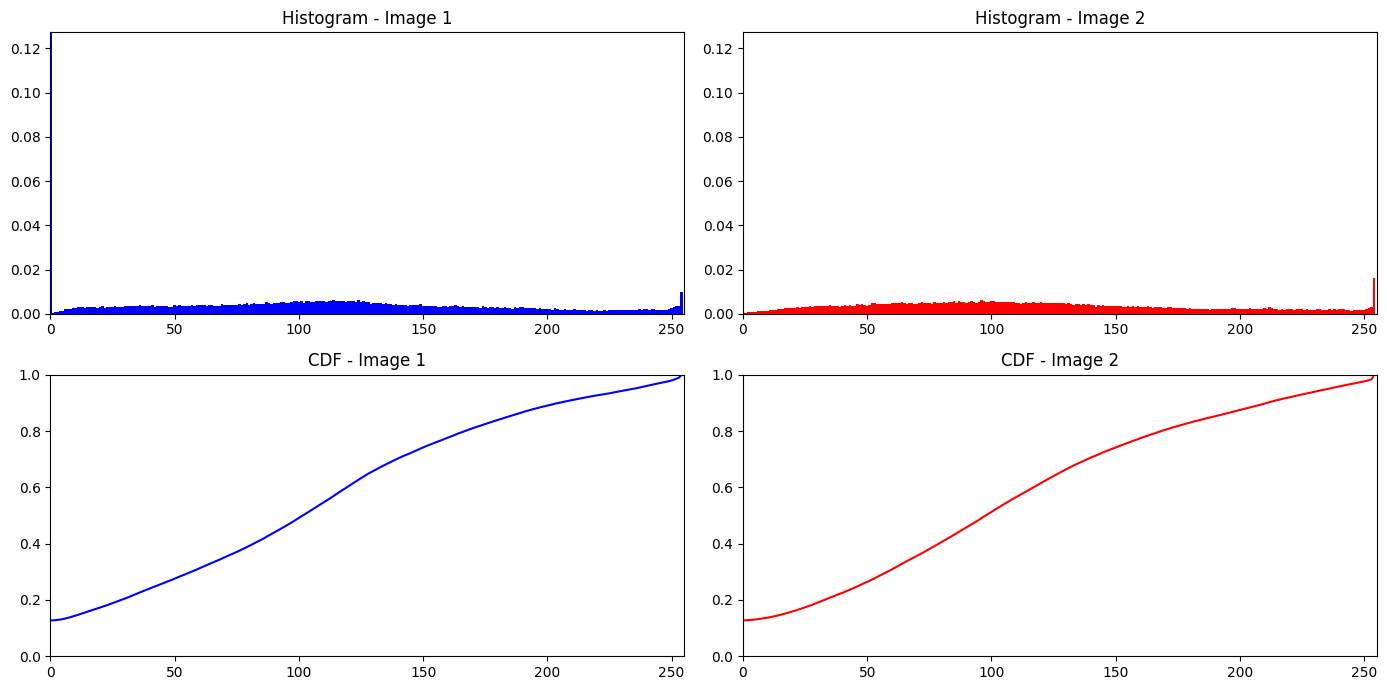

In [6]:

# We will visualize the histograms to compare the pixel intensity distributions more clearly.

# Define the number of bins for histogram
bins = np.arange(256)

# Calculate histograms
hist1, bins1 = np.histogram(img1_array.flatten(), bins=bins, density=True)
hist2, bins2 = np.histogram(img2_array.flatten(), bins=bins, density=True)

# Calculate CDF (Cumulative Distribution Function) for each image
cdf1 = hist1.cumsum()
cdf1_normalized = cdf1 / cdf1[-1]

cdf2 = hist2.cumsum()
cdf2_normalized = cdf2 / cdf2[-1]

# Plot histograms and CDFs
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

# Plot histogram for Image 1
axs[0, 0].bar(bins[:-1], hist1, width=1, color='blue')
axs[0, 0].set_title('Histogram - Image 1')
axs[0, 0].set_xlim([0, 255])
axs[0, 0].set_ylim([0, max(hist1.max(), hist2.max())])

# Plot CDF for Image 1
axs[1, 0].plot(cdf1_normalized, color='blue')
axs[1, 0].set_title('CDF - Image 1')
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, 1])

# Plot histogram for Image 2
axs[0, 1].bar(bins[:-1], hist2, width=1, color='red')
axs[0, 1].set_title('Histogram - Image 2')
axs[0, 1].set_xlim([0, 255])
axs[0, 1].set_ylim([0, max(hist1.max(), hist2.max())])

# Plot CDF for Image 2
axs[1, 1].plot(cdf2_normalized, color='red')
axs[1, 1].set_title('CDF - Image 2')
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, 1])

# Set layout to tight for better spacing
plt.tight_layout()
plt.show()


直方图：展示了图像 1（蓝色）和图像 2（红色）的像素强度分布。这些分布反映了每个像素强度值的频率。

图像 1的直方图显示出大部分像素集中在低强度值，这表明图像偏暗。
图像 2的直方图显示出较为均匀的分布，但有明显的高强度值集中，表明图像可能具有更高的亮度和对比度。
累积分布函数（CDF）：表示图像像素强度的累积百分比。

图像 1的CDF曲线比较平滑，这通常意味着图像的亮度较一致，但动态范围较窄，因为曲线较早达到了累积的100%。
图像 2的CDF曲线上升得更慢，这意味着图像具有更广的动态范围和更高的对比度，因为曲线在整个强度范围内均匀上升。
通过直方图，我们可以看出图像 2 在像素强度的动态范围方面可能更优于图像 1。通过CDF，我们可以进一步确认这一点，因为图像 2 在整个强度范围内有更均匀的累积分布，这表明它具有更好的对比度。这些统计数据提供了关于图像像素分布的定量信息，但对图像质量的综合评价仍然需要结合其他因素，如色彩、细节和纹理等。